<a href="https://colab.research.google.com/github/stevengregori92/Loan-Dataset-with-Jcopml-and-Sklearn/blob/main/Loan_Dataset_with_Jcopml_and_Sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Libraries

In [ ]:
!pip install luwiji

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from jcopml.pipeline import num_pipe, cat_pipe
from jcopml.tuning import grid_search_params as gsp

ModuleNotFoundError: ignored

#Import Dataset

In [ ]:
data = pd.read_csv('loan_train.csv')
data

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
0,Male,No,0,Graduate,No,584900,0.0,15000000,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,458300,150800.0,12800000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,300000,0.0,6600000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,258300,235800.0,12000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,600000,0.0,14100000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,290000,0.0,7100000,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,410600,0.0,4000000,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,807200,24000.0,25300000,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,758300,0.0,18700000,360.0,1.0,Urban,Y


#EDA

In [ ]:
data.isna().sum()

Gender                13
Married                3
Dependents            15
Education              0
Self_Employed         32
Applicant_Income       0
Coapplicant_Income     0
Loan_Amount            0
Term                  14
Credit_History        50
Area                   0
Status                 0
dtype: int64

In [ ]:
data.groupby('Applicant_Income').mean()

,Coapplicant_Income,Loan_Amount,Term,Credit_History
Applicant_Income,,,,
15000,180000.0,13500000.0,360.0,1.0
21000,291700.0,9800000.0,360.0,1.0
41600,4166700.0,35000000.0,180.0,NaN
64500,368300.0,11300000.0,480.0,1.0
67400,529600.0,16800000.0,360.0,1.0
...,...,...,...,...
3914700,475000.0,12000000.0,360.0,1.0
3999900,0.0,60000000.0,180.0,0.0
5176300,0.0,70000000.0,300.0,1.0


In [ ]:
data['Applicant_Income'] = data['Applicant_Income'].astype(float)
data['Loan_Amount'] = data['Loan_Amount'].astype(float)

In [ ]:
pd.get_dummies(data, columns=['Status'])

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status_N,Status_Y
0,Male,No,0,Graduate,No,584900.0,0.0,15000000.0,360.0,1.0,Urban,0,1
1,Male,Yes,1,Graduate,No,458300.0,150800.0,12800000.0,360.0,1.0,Rural,1,0
2,Male,Yes,0,Graduate,Yes,300000.0,0.0,6600000.0,360.0,1.0,Urban,0,1
3,Male,Yes,0,Not Graduate,No,258300.0,235800.0,12000000.0,360.0,1.0,Urban,0,1
4,Male,No,0,Graduate,No,600000.0,0.0,14100000.0,360.0,1.0,Urban,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,290000.0,0.0,7100000.0,360.0,1.0,Rural,0,1
610,Male,Yes,3+,Graduate,No,410600.0,0.0,4000000.0,180.0,1.0,Rural,0,1
611,Male,Yes,1,Graduate,No,807200.0,24000.0,25300000.0,360.0,1.0,Urban,0,1
612,Male,Yes,2,Graduate,No,758300.0,0.0,18700000.0,360.0,1.0,Urban,0,1


#Numeric vs Target

<ipython-input-8-9eb38d69ff73>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.Applicant_Income[data.Status == 'N'], bins = 25, color='r', label='N')
<ipython-input-8-9eb38d69ff73>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.Applicant_Income[data.Status == 'Y'], bins = 25, color=

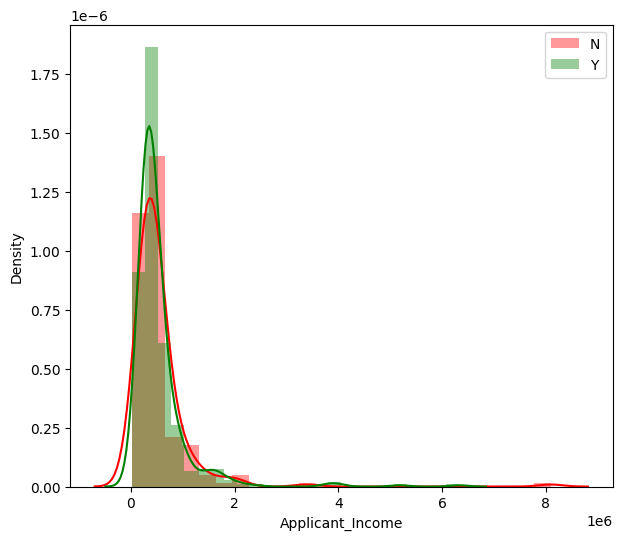

In [ ]:
plt.figure(figsize=(7,6))
sns.distplot(data.Applicant_Income[data.Status == 'N'], bins = 25, color='r', label='N')
sns.distplot(data.Applicant_Income[data.Status == 'Y'], bins = 25, color='g', label='Y')
plt.legend()

<ipython-input-9-2d479753cce6>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.Coapplicant_Income[data.Status == 'N'], bins = 25, color='r', label='N')
<ipython-input-9-2d479753cce6>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.Coapplicant_Income[data.Status == 'Y'], bins = 25, co

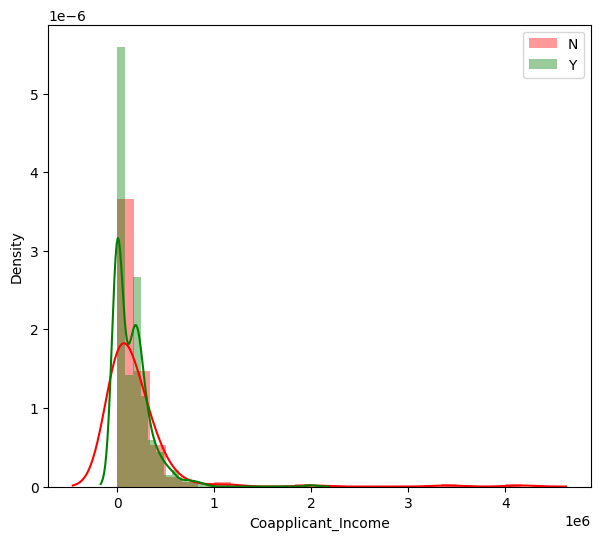

In [ ]:
plt.figure(figsize=(7,6))
sns.distplot(data.Coapplicant_Income[data.Status == 'N'], bins = 25, color='r', label='N')
sns.distplot(data.Coapplicant_Income[data.Status == 'Y'], bins = 25, color='g', label='Y')
plt.legend()

<ipython-input-10-d28d4aaa75aa>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.Loan_Amount[data.Status == 'N'], bins = 25, color='r', label='N')
<ipython-input-10-d28d4aaa75aa>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.Loan_Amount[data.Status == 'Y'], bins = 25, color='g', lab

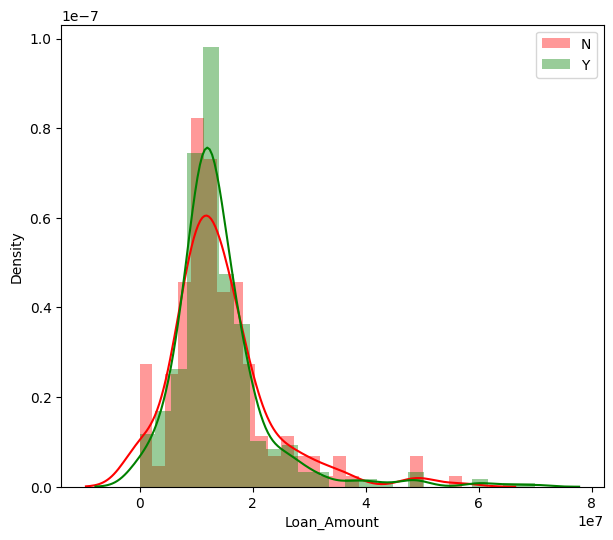

In [ ]:
plt.figure(figsize=(7,6))
sns.distplot(data.Loan_Amount[data.Status == 'N'], bins = 25, color='r', label='N')
sns.distplot(data.Loan_Amount[data.Status == 'Y'], bins = 25, color='g', label='Y')
plt.legend()

<ipython-input-11-83ff81940336>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.Term[data.Status == 'N'], bins = 15, color='r', label='N')
<ipython-input-11-83ff81940336>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.Term[data.Status == 'Y'], bins = 15, color='g', label='Y')


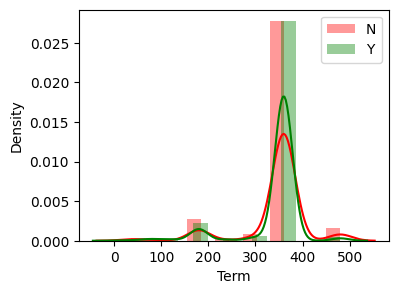

In [ ]:
plt.figure(figsize=(4,3))
sns.distplot(data.Term[data.Status == 'N'], bins = 15, color='r', label='N')
sns.distplot(data.Term[data.Status == 'Y'], bins = 15, color='g', label='Y')
plt.legend()

<ipython-input-12-15cdf3804e9c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.Credit_History[data.Status == 'N'], bins = 15, color='r', label='N')
<ipython-input-12-15cdf3804e9c>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.Credit_History[data.Status == 'Y'], bins = 15, color='g

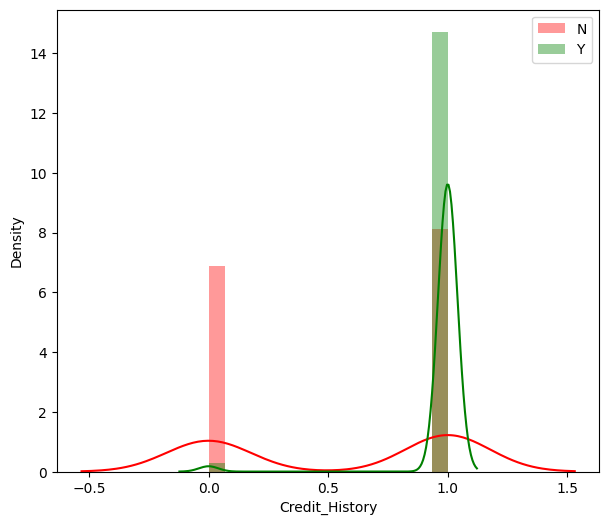

In [ ]:
plt.figure(figsize=(7,6))
sns.distplot(data.Credit_History[data.Status == 'N'], bins = 15, color='r', label='N')
sns.distplot(data.Credit_History[data.Status == 'Y'], bins = 15, color='g', label='Y')
plt.legend()

#Numeric to Categoric

In [ ]:
data.Applicant_Income = pd.cut(data.Applicant_Income, [0,0.5,1,10], labels = ['low', 'middle', 'high'])
data.head()

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
0,Male,No,0,Graduate,No,NaN,0.0,15000000.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,NaN,150800.0,12800000.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,NaN,0.0,6600000.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,NaN,235800.0,12000000.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,NaN,0.0,14100000.0,360.0,1.0,Urban,Y


In [ ]:
data.Coapplicant_Income = pd.cut(data.Coapplicant_Income, [0,0.5,1,10], labels = ['low', 'middle', 'high'])
data.head()

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
0,Male,No,0,Graduate,No,NaN,NaN,15000000.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,NaN,NaN,12800000.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,NaN,NaN,6600000.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,NaN,NaN,12000000.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,NaN,NaN,14100000.0,360.0,1.0,Urban,Y


#Data Split

In [ ]:
X = data.drop(columns=['Status'])
y = data.Status

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state = 42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((491, 11), (123, 11), (491,), (123,))

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Gender              601 non-null    object  
 1   Married             611 non-null    object  
 2   Dependents          599 non-null    object  
 3   Education           614 non-null    object  
 4   Self_Employed       582 non-null    object  
 5   Applicant_Income    0 non-null      category
 6   Coapplicant_Income  0 non-null      category
 7   Loan_Amount         614 non-null    float64 
 8   Term                600 non-null    float64 
 9   Credit_History      564 non-null    float64 
 10  Area                614 non-null    object  
 11  Status              614 non-null    object  
dtypes: category(2), float64(3), object(7)
memory usage: 49.6+ KB


#Preprocessing

In [ ]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(scaling='minmax'), X.select_dtypes(include='float').columns),
    ('categoric', cat_pipe(encoder='onehot'), ['Gender', 'Married', 'Dependents', 
                                               'Education', 'Self_Employed',
                                               'Applicant_Income','Coapplicant_Income', 'Area'])
])

#Training

In [ ]:
pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', KNeighborsClassifier())
])

model = GridSearchCV(pipeline, gsp.knn_params, cv=3, n_jobs=-1, verbose=1, error_score='raise')
model.fit(X_train, y_train)

Fitting 3 folds for each of 90 candidates, totalling 270 fits


GridSearchCV(cv=3, error_score='raise',
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          MinMaxScaler())]),
                                                                         Index(['Loan_Amount', 'Term', 'Credit_History'], dtype='object')),
                                                                        ('categoric',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('...
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Gender',
                                                                          'Married',
                                                                          'Dependents',
                                                                          'Education',
                                                                          'Self_Employed',
                                                                          'Applicant_Income',
                                                                          'Coapplicant_Income',
                                                                          'Area'])])),
                                       ('algo', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'algo__n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29]),
                         'algo__p': [1, 1.5, 2],
                         'algo__weights': ['uniform', 'distance']},
             verbose=1)

#Evaluate

In [ ]:
print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

{'algo__n_neighbors': 9, 'algo__p': 2, 'algo__weights': 'distance'}
0.9898167006109979 0.7779565065589306 0.7317073170731707
